In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [4]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#гипотеза 1: из общего кол-ва пассажиров женщин выживало больше, чем мужчин
survival_by_gender=df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print(survival_by_gender)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


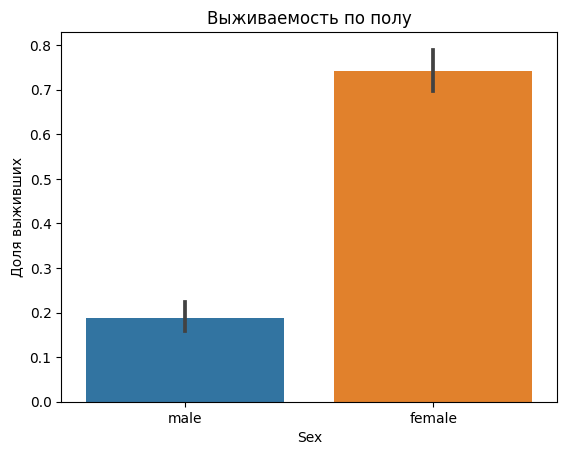

In [8]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Выживаемость по полу')
plt.ylabel('Доля выживших')
plt.show()

In [9]:
#гипотеза 2: пассажиры, севшие на борт в разных портах, имели разные шансы на выживание
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
survival_by_embarked=df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack() #группировка по новому признаку и подсчёт доли выживших с разных портов
print(survival_by_embarked)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009


/tmp/ipykernel_17/142265959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


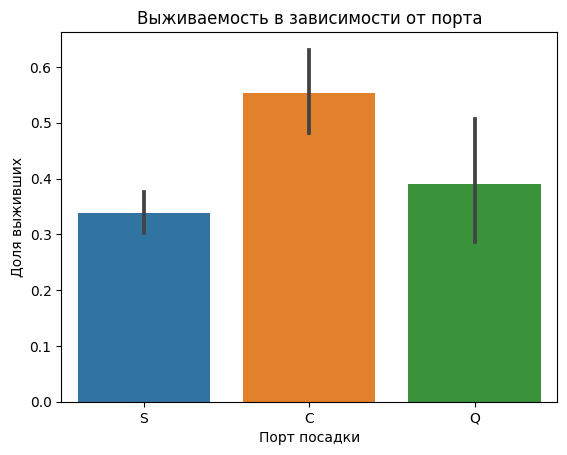

In [10]:
#график, подтверждающий гипотезу 2
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Выживаемость в зависимости от порта')
plt.ylabel('Доля выживших')
plt.xlabel('Порт посадки')
plt.show()

In [11]:
#гипотеза 3: пассажиры с родственниками на борту имели больше шансов выжить
df['Relatives']=df['SibSp']+df['Parch'] #создание нового столбца с общим кол-вом родственников
df['Has_Relatives']=df['Relatives'].apply(lambda x:1 if x>0 else 0) #преобразовали кол-во родственников в бин.признак (-1-у кого были родственники на борту, 0 - у кого не было)
survival_by_relatives=df.groupby('Has_Relatives')['Survived'].value_counts(normalize=True).unstack() #подсчёт доли выживших кто был с родственниками на борту и без
print(survival_by_relatives)

Survived              0         1
Has_Relatives                    
0              0.696462  0.303538
1              0.494350  0.505650


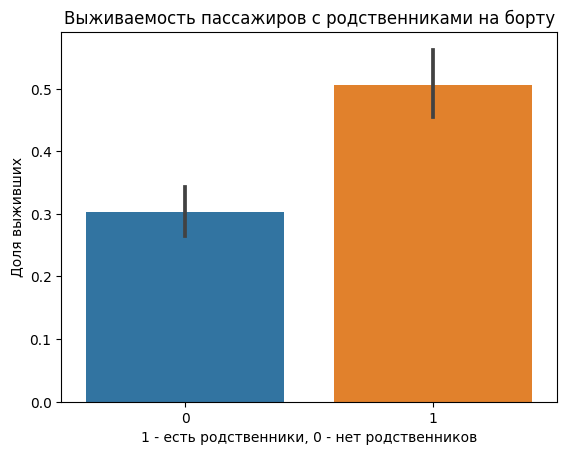

In [12]:
#график, подтверждающий гипотезу 3
sns.barplot(x='Has_Relatives', y='Survived', data=df)
plt.title('Выживаемость пассажиров с родственниками на борту')
plt.ylabel('Доля выживших')
plt.xlabel('1 - есть родственники, 0 - нет родственников')
plt.show()

In [13]:
#гипотеза 4: пассажиры с высокими тарифами имели больше шансов на выживание
df['Fare'].fillna(df['Fare'].median(), inplace=True) #проверка наличия пропущенных значений в Fare
df['Fare_Category']=pd.qcut(df['Fare'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High']) #разделение билетов на категории от наивысшего к меньшему
survival_by_fare=df.groupby('Fare_Category')['Survived'].value_counts(normalize=True).unstack() #группировка данным по категориям, подсчёт доли выживших
print(survival_by_fare)

Survived              0         1
Fare_Category                    
Low            0.802691  0.197309
Mid-Low        0.696429  0.303571
Mid-High       0.545045  0.454955
High           0.418919  0.581081


/tmp/ipykernel_17/140219759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True) #проверка наличия пропущенных значений в Fare
/tmp/ipykernel_17/140219759.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare=df.groupby('Fare_Category')['Survived'].value_counts(normalize=T

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


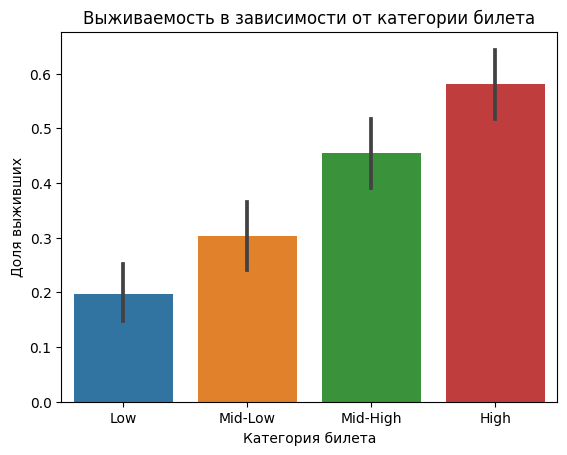

In [14]:
#график, подтверждающий гипотезу 4
sns.barplot(x='Fare_Category', y='Survived', data=df)
plt.title('Выживаемость в зависимости от категории билета')
plt.ylabel('Доля выживших')
plt.xlabel('Категория билета')
plt.show()

In [15]:
#гипотеза 5: дети имели больше шансов выжить
df['Child']=df['Age'].apply(lambda x:1 if x<16 else 0) #добавим новый столбец,где пассажиры,младше 16 лет - 1, а кто старше этого возраста - 0 (деление на ребёнок/не ребёнок)
survival_by_age=df.groupby('Child')['Survived'].value_counts(normalize=True).unstack() #группировка по новому признаку и подсчёт долю выживших среди детей и взрослых
print(survival_by_age)

Survived         0         1
Child                       
0         0.637376  0.362624
1         0.409639  0.590361


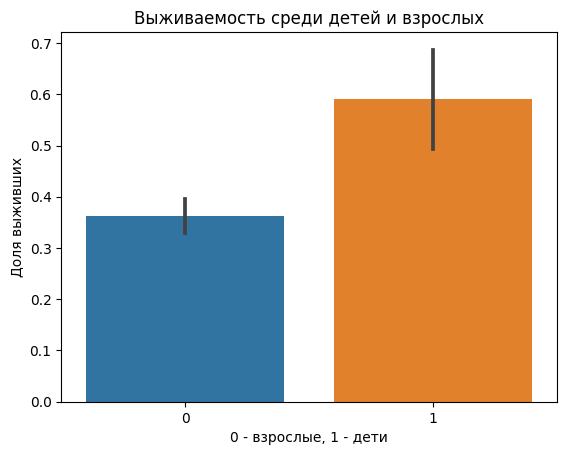

In [16]:
#график, подтверждающий гипотезу 5
sns.barplot(x='Child', y='Survived', data=df)
plt.title('Выживаемость среди детей и взрослых')
plt.ylabel('Доля выживших')
plt.xlabel('0 - взрослые, 1 - дети')
plt.show()

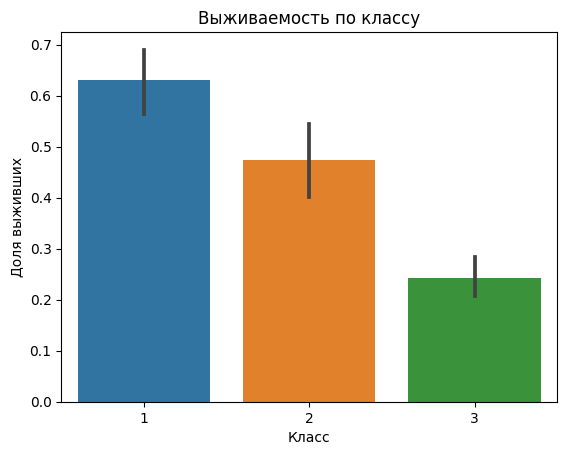

In [17]:
#гипотеза 6: пассажиров из первого класса выжило больше, чем пассажиров из второго и третьего классов
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Выживаемость по классу')
plt.ylabel('Доля выживших')
plt.xlabel('Класс')
plt.show()

In [18]:
#Выводы
#Гипотеза 1: из общего кол-ва пассажиров женщин выживало больше, чем мужчин.
#пояснение: пассажиры следовали правилу: "спасайте женщин и детей".
#Гипотеза 2: пассажиры, севшие на борт в разных портах, имели разные шансы на выживание
#пояснение: пассажиры имели различие в социальном статусе, которое позволило повлиять на их возможность спасения.
#Гипотеза 3: пассажиры с родственниками на борту имели больше шансов выжить.
#пояснение: пассажиры с родственниками на борту получали помощь от членов семьи.
#Гипотеза 4: пассажиры с высокими тарифами имели больше шансов на выживание.
#пояснение: стоимость билета может коррелировать на соц.статус человека, а также в расположении кают ближе к спасательным выходам(шлюпкам).
#Гипотеза 5: дети имели больше шансов выжить.
#пояснение: пассажиры следовали правилу, который гласит, что женщин и детей нужно спасать в первую очередь, дети получали приоритет при спасении.
#Гипотеза 6: пассажиров из первого класса выжило больше, чем пассажиров из второго и третьего классов.
#пояснение: пассажиры первого класса были ближе всего к выходу, нежели пассажиры из второго и третьего классов.